# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

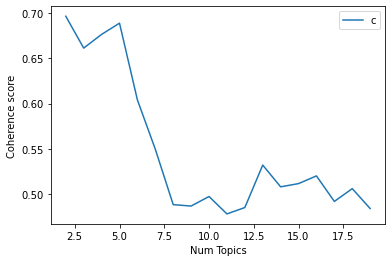

In [17]:
# Write your code here

# GETTING ARTICLE TITLES FROM EXERCISE 06

import pandas as pd 
data = pd.read_csv(r'C:\Users\Raheyma Arshad\Desktop\Titles.csv')

# DATA CLEANING AND PREPROCESSING

# Lower casing
data['Title'] = data['Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Punctuation removal
data['Title'] = data['Title'].str.replace('[^\w\s]','')

# Stopwords removal
from nltk.corpus import stopwords
import nltk
stop = stopwords.words('english')
data['Title'] = data['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Frequent words removal
high_freq = pd.Series(' '.join(data['Title']).split()).value_counts()[:10]
high_freq = list(high_freq.index)
data['Title'] = data['Title'].apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))

# Lemmatization
from textblob import Word
data['Title'] = data['Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Tokenization
data['Title'] = data['Title'].apply(lambda x: nltk.word_tokenize(x))

# CONSTRUCTING A DOCUMENT-TERM MATRIX

# Keeping all tokenized titles in a list.
titles = data['Title'].to_list()

from gensim import corpora, models
id2word = corpora.Dictionary(titles)
corpus = [id2word.doc2bow(title) for title in titles]

# FINDING OPTIMAL NUMBER OF TOPICS FOR LDA MODEL

import gensim
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=titles, start=2, limit=20, step=1)

# Graph of Coherence Score against Number of Topics 
import matplotlib.pyplot as plt
%matplotlib inline
start=2; limit=20; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
# APPLYING THE LDA MODEL

# The optimal number of topics is 2 for the LDA Model.

ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=2)

# EXAMINING THE RESULTS

from pprint import pprint
print('The topics using LDA Model are:')
pprint(ldamodel.print_topics())

# Compute Perplexity
print('Perplexity:', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=titles, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

The topics using LDA Model are:
[(0,
  '0.015*"review" + 0.014*"study" + 0.011*"comparative" + 0.011*"disease" + '
  '0.010*"data" + 0.009*"forecasting" + 0.008*"htmlhtml" + 0.008*"modeling" + '
  '0.008*"hybrid" + 0.008*"application"'),
 (1,
  '0.013*"network" + 0.012*"stock" + 0.012*"predicting" + 0.011*"forecasting" '
  '+ 0.008*"feature" + 0.008*"overview" + 0.008*"application" + 0.008*"data" + '
  '0.007*"intrusion" + 0.007*"applied"')]
Perplexity: -6.319416291420846
Coherence Score: 0.7099578227090291


## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

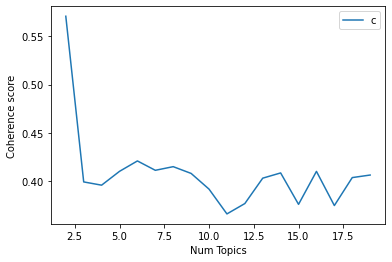

In [18]:
# Write your code here

# FINDING OPTIMAL NUMBER OF TOPICS FOR LSA MODEL

from gensim.models import LsiModel
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

lsa_model_list, lsa_coherence_values = compute_lsa_coherence_values(dictionary=id2word, corpus=corpus, texts=titles, start=2, limit=20, step=1)

# Graph of Coherence Score against Number of Topics 
start=2; limit=20; step=1;
x = range(start, limit, step)
plt.plot(x, lsa_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
# APPLYING THE LSA MODEL

# The optimal number of topics is 2 for the LDA Model.

lsamodel = LsiModel(corpus=corpus, id2word=id2word, num_topics=2)

############################################################################################################################
# EXAMINING THE RESULTS

from pprint import pprint
print('The topics using LSA Model are:')
pprint(lsamodel.print_topics())

# Compute Coherence Score
coherence_model_lsa = CoherenceModel(model=lsamodel, texts=titles, dictionary=id2word, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score:', coherence_lsa)

The topics using LSA Model are:
[(0,
  '-0.556*"stock" + -0.353*"predicting" + -0.285*"data" + -0.279*"forecasting" '
  '+ -0.246*"index" + -0.232*"price" + -0.181*"market" + -0.165*"movement" + '
  '-0.165*"preparation" + -0.165*"trend"'),
 (1,
  '0.594*"network" + 0.334*"radio" + 0.334*"cognitive" + 0.283*"cooperative" + '
  '0.283*"spectrum" + 0.182*"supervised" + 0.182*"applied" + 0.148*"handover" '
  '+ 0.135*"sensing" + -0.117*"stock"')]
Coherence Score: 0.5646848349809216


## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

'''
LDA MODEL:

For the LDA Model, the coherence scores graph shows that number of topics = 2 gives the model with the best coherence score.
So, we run the LDA Model with num_of_topics = 2. The results are shown below.

1.'0.015*"review" + 0.014*"study" + 0.011*"comparative" + 0.011*"disease" + '
  '0.010*"data" + 0.009*"forecasting" + 0.008*"htmlhtml" + 0.008*"modeling" + '
  '0.008*"hybrid" + 0.008*"application"'

2.'0.013*"network" + 0.012*"stock" + 0.012*"predicting" + 0.011*"forecasting" '
  '+ 0.008*"feature" + 0.008*"overview" + 0.008*"application" + 0.008*"data" + '
  '0.007*"intrusion" + 0.007*"applied"'

Each topic shows the top 10 keywords that contribute to the topic. The coefficients show the weight of each keyword in each 
topic. The coefficients are not very high which means all keywords are not very highly representative of their topics.
Perplexity captures how surprised a model is of new data it has not seen before, and should be as low as possible.
The perplexity score for our model is -6.32 which is very good. 

Coherence scores a single topic by measuring the degree of semantic similarity between high scoring words in the topic. The 
higher the coherence value, the better is the model. Our LDA Model has coherence score of 0.71. 

LSA MODEL:

For the LSA Model also, the coherence scores graph shows that number of topics = 2 gives the model with the best coherence 
score. So, we run the LSA Model with num_of_topics = 2. The results are shown below.

1.'-0.556*"stock" + -0.353*"predicting" + -0.285*"data" + -0.279*"forecasting" '
  '+ -0.246*"index" + -0.232*"price" + -0.181*"market" + -0.165*"movement" + '
  '-0.165*"preparation" + -0.165*"trend"'
  
2.'0.594*"network" + 0.334*"radio" + 0.334*"cognitive" + 0.283*"cooperative" + '
  '0.283*"spectrum" + 0.182*"supervised" + 0.182*"applied" + 0.148*"handover" '
  '+ 0.135*"sensing" + -0.117*"stock"' 

Our LSA Model has coherence score of 0.56. The coefficients of the keywords are much higher than they were in LDA Model.
We should note that topic 1 has negative coefficients for all keywords. This means the words are highly unrepresentative 
of the topic. 

COMPARISON:

The Coherence scores show that LDA is a better model than LSA.

The LDA Model looks at each document as a set of topics and each topic as a set of keywords. It rearranges the topics within
the documents and keywords within the topics to obtain a good composition of topic-keywords. While the LSA Model attempts to
leverage the context around the words to capture the hidden concepts.

Our titles dataset does not contain much context, only the titles of articles. Therefore, LSA Model does not have the proper
context to conduct semantic analysis on. The LDA Model works better in this case because it only uses the words and does not
do semantic analysis. We can also see that keywords having positive weightage in LDA Model have high negative weightage in 
LSA Model. Looking at our dataset we can see that the LSA Model is incorrectly giving the negative weightage to words like 
data, predicting, forecasting. 

Therefore, the LDA Model is better for our Titles dataset. 

'''